# K - Nearest Neighbors

A k-nearest-neighbor is a data classification algorithm that attempts to determine what group a data point is in by looking at the data points around it.

An algorithm, looking at one point on a grid, trying to determine if a point is in group A or B, looks at the states of the points that are near it. The range is arbitrarily determined, <br>
but the point is to take a sample of the data. If the majority of the points are in group A, then it is likely that the data point in question will be A rather than B, and vice versa.

The k-nearest-neighbor is an example of a "lazy learner" algorithm because it does not generate a model of the data set beforehand. The only calculations it makes are when it is asked to poll the data point's neighbors. This makes k-nn very easy to implement for data mining.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from collections import Counter
import random

In [2]:
dataset = {
    'k' : [[1,2], [2,3], [3,1]],
    'r' : [[6, 5], [7,7], [8,6]]
}
new_feature = [5,7]

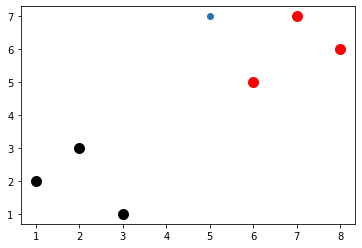

In [3]:
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]

plt.scatter(new_feature[0], new_feature[1])
plt.show()

In [4]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distance=[]
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distance.append([euclidean_distance, group])
            
    votes = [i[1] for i in sorted(distance)[:k]]
#     print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    
    return vote_result, confidence

In [5]:
result = k_nearest_neighbors(dataset, new_feature, k=3)

print(result)

('r', 1.0)


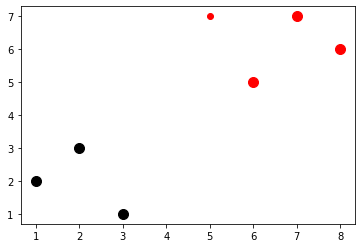

In [6]:
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]

plt.scatter(new_feature[0], new_feature[1], color=result[0])
plt.show()

## Implementing our version of KNN

In [7]:
df = pd.read_csv('breast-cancer-wisconsin.data')

df.replace('?', -99999, inplace=True)
df.drop('id', axis=1, inplace=True)
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### Our version

In [8]:
full_data = df.astype(float).values.tolist()
full_data[:5]

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0]]

In [9]:
random.shuffle(full_data)
full_data[:5]

[[8.0, 5.0, 5.0, 5.0, 2.0, 10.0, 4.0, 3.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 6.0, 6.0, 3.0, 4.0, 5.0, 3.0, 6.0, 1.0, 4.0],
 [6.0, 3.0, 4.0, 1.0, 5.0, 2.0, 3.0, 9.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0]]

In [10]:
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}

train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [11]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
        
        
accuracy = correct/total
print(accuracy)

0.9568345323741008
